In [12]:
import yfinance as yf
import pandas as pd

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Show the first five rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch Tesla revenue page from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the first table with class "historical_data_table"
tesla_revenue = pd.DataFrame()
for table in soup.find_all("table", {"class": "historical_data_table table"}):
    try:
        df = pd.read_html(str(table))[0]
        if "Tesla Quarterly Revenue" in df.columns[0]:
            continue  # Skip header table
        df.columns = ["Date", "Revenue"]
        df["Revenue"] = df["Revenue"].str.replace("$", "", regex=True).str.replace(",", "", regex=True)
        df.dropna(inplace=True)
        tesla_revenue = df
        break
    except Exception as e:
        print("Error reading table:", e)

# Display last five rows
if tesla_revenue.empty:
    print("❌ Tesla revenue table not found.")
else:
    print("✅ Tesla revenue data extracted:")
    print(tesla_revenue.tail())



❌ Tesla revenue table not found.


In [14]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Show the first five rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch GameStop revenue page from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Look for tables with specific class used for revenue data
gme_revenue = pd.DataFrame()

for table in soup.find_all("table", {"class": "historical_data_table table"}):
    try:
        df = pd.read_html(str(table))[0]
        # Skip intro header table
        if "GameStop Quarterly Revenue" in df.columns[0]:
            continue
        df.columns = ["Date", "Revenue"]
        df["Revenue"] = df["Revenue"].str.replace("$", "", regex=True).str.replace(",", "", regex=True)
        df.dropna(inplace=True)
        gme_revenue = df
        break
    except Exception as e:
        print("Error reading table:", e)

# Display last five rows
if gme_revenue.empty:
    print("❌ GameStop revenue data not found.")
else:
    print("✅ GameStop revenue data extracted successfully:")
    print(gme_revenue.tail())



❌ GameStop revenue data not found.


KeyError: 'Date'

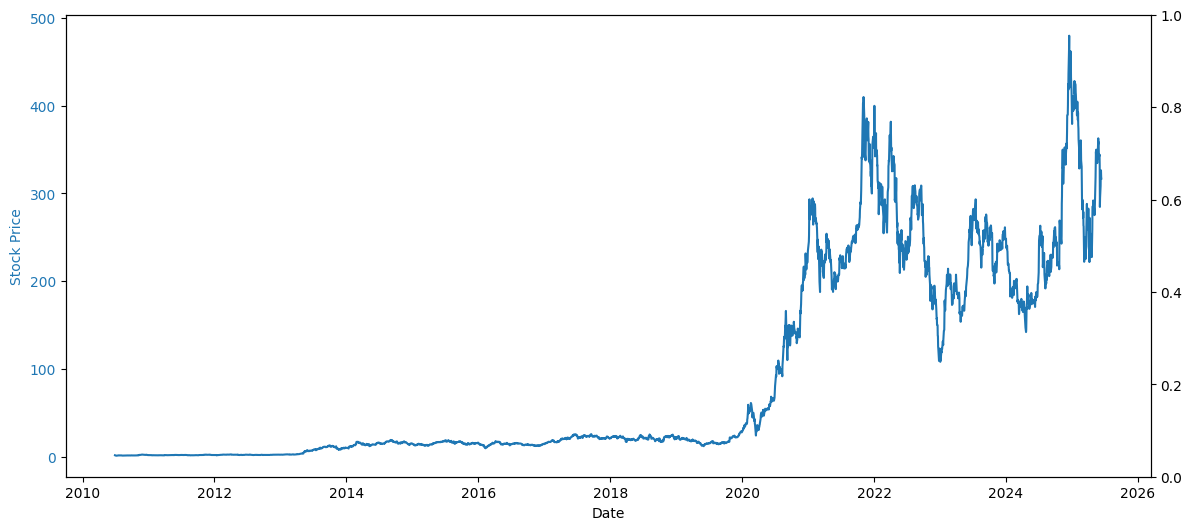

In [24]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, revenue_label):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:red', label="Revenue")
    ax2.set_ylabel("Revenue", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f"{stock} Stock Price vs {revenue_label} Revenue")
    plt.show()

# Plot Tesla
make_graph(tesla_data, tesla_revenue, "Tesla", "Tesla")


KeyError: 'Date'

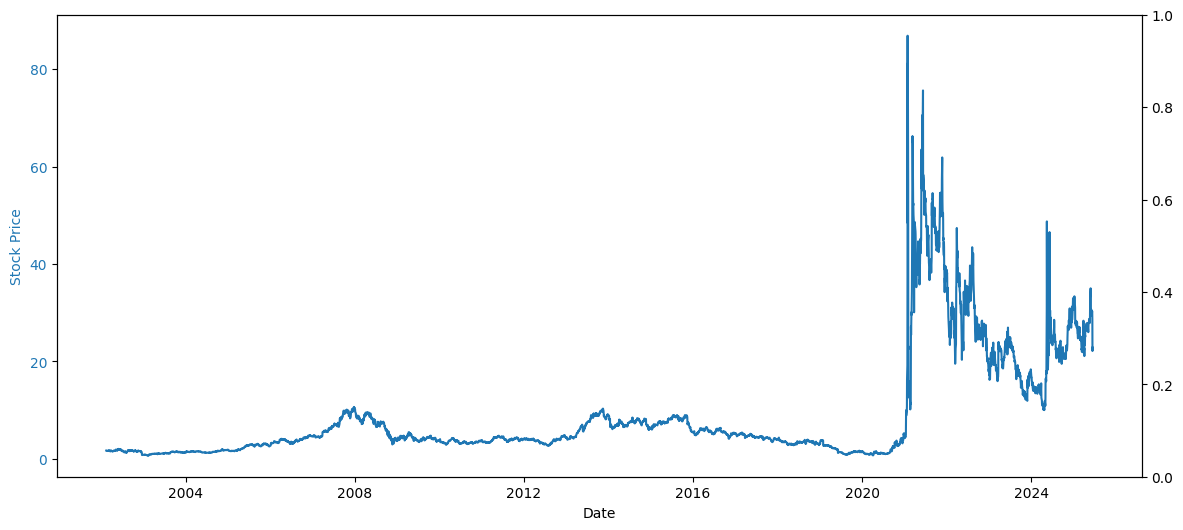

In [25]:
# Plot GameStop
make_graph(gme_data, gme_revenue, "GameStop", "GameStop")
